# Pandas

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/logo.png" width=150>

In this notebook, we'll learn the basics of data analysis with the Python Pandas library.

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/pandas.png" width=500>




# Uploading the data

We're first going to get some data to play with. We're going to load the titanic dataset from the public link below.

In [1]:
import urllib

In [2]:
# Upload data from GitHub to notebook's local drive
url = "https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/data/titanic.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open('titanic.csv', 'wb') as f:
    f.write(html)

In [3]:
# Checking if the data was uploaded
!ls -l 

total 208
-rw-r--r-- 1 arrayslayer arrayslayer 24355 Jan 15 18:18 01_Python.ipynb
-rw-r--r-- 1 arrayslayer arrayslayer 16636 Jan 15 18:42 02_NumPy.ipynb
-rw-r--r-- 1 arrayslayer arrayslayer 61257 Jan 15 15:36 03_Pandas.ipynb
-rw-rw-r-- 1 arrayslayer arrayslayer 16609 Jan 15 17:24 Lab1.zip
-rw-r--r-- 1 arrayslayer arrayslayer 85153 Jan 15 18:44 titanic.csv


# Loading the data

Now that we have some data to play with, let's load it into a Pandas dataframe. Pandas is a great Python library for data analysis.

In [4]:
import pandas as pd

In [9]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv("titanic.csv", header=0)

In [ ]:
pd.re

In [11]:
# First five items
df.head(n=10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,1
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,1
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,0


These are the diferent features: 
* pclass: class of travel
* name: full name of the passenger
* sex: gender
* age: numerical age
* sibsp: # of siblings/spouse aboard
* parch: number of parents/child aboard
* ticket: ticket number
* fare: cost of the ticket
* cabin: location of room
* emarked: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q = Queenstown)
* survived: survial metric (0 - died, 1 - survived)

# Exploratory analysis

We're going to use the Pandas library and see how we can explore and process our data.

In [7]:
# Describe features
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [13]:
%matplotlib inline

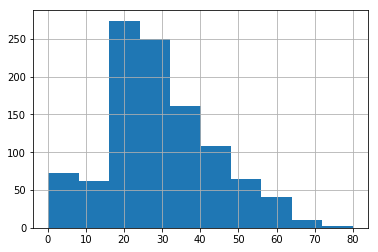

In [14]:
# Histograms
df["age"].hist()

In [15]:
# Unique values
df["embarked"].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [17]:
# Selecting data by feature
df["name"].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [11]:
# Filtering
df[df["sex"]=="female"].head() # only the female data appear

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [20]:
# Sorting
df.sort_values("age", ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


In [13]:
# Grouping
survived_group = df.groupby("survived")
survived_group.mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


In [14]:
# Selecting row
df.iloc[0, :] # iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [15]:
# Selecting specific value
df.iloc[0, 1]


'Allen, Miss. Elisabeth Walton'

In [16]:
# Selecting by index
df.loc[0] # loc gets rows (or columns) with particular labels from the index

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

# Preprocessing

In [17]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [18]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [19]:
# Dropping multiple columns
df = df.drop(["name", "cabin", "ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [20]:
# Map feature values
df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df["embarked"] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


# Feature engineering

In [0]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [23]:
df['family'] = df['sibsp'] + df['parch']

In [25]:
# Reorganize headers
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df.head()

KeyError: "['family_size'] not in index"

# Saving data

In [0]:
# Saving dataframe to CSV
df.to_csv("processed_titanic.csv", index=False)

In [0]:
# See your saved file
!ls -l

total 96
-rw-r--r-- 1 root root  6975 Oct  8 17:49 processed_titanic.csv
drwxr-xr-x 2 root root  4096 Sep 28 23:32 sample_data
-rw-r--r-- 1 root root 85153 Oct  8 17:48 titanic.csv
